# Project 1

# Used Vehicle Price Prediction

#### Jeimmy Rocio Espinel - Codigo: 201628049
#### Ferney Rincon - Codigo:201728024
#### Rodrigo Amortegui - Codigo:199827026

### 1. Módulo para cargar el modelo

In [2]:
import pandas as pd
from sklearn.externals import joblib
import sys

In [3]:
def predict(arreglo):
    clf = joblib.load('bestModel2.pkl')   # Se invoca el modelo con el mejor resultado 
    p1 = clf.predict(arreglo)
    return p1


### 2. Módulo para crear el Server Flask

In [7]:
import pandas as pd

from flask import Flask
from flask_restplus import Api, Resource, fields
from sklearn.externals import joblib
from model_deployment import predict

In [8]:
app = Flask(__name__)

api = Api(
    app,
    version='1.0',
    title='Predicción precios autos',
    description='API de prueba para predecir precios de autos')

ns = api.namespace('predict',
     description='Predicción precios')

parser = api.parser()

#Se crean los parámetros de Entrada  
parser.add_argument('Year', type=int, required=True, help='Año(modelo auto)',location='args')
parser.add_argument('Mileage', type=int, required=True, help='Millas',location='args')
parser.add_argument('State', type=str, required=True, help='Estado',location='args')
parser.add_argument('Make', type=str, required=True, help='Marca',location='args')
parser.add_argument('Model', type=str, required=True, help='Modelo',location='args')


resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [9]:
@ns.route('/')
class PhishingApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()

        listArg = list();
        listArg.append(args['Year'])
        listArg.append(args['Mileage'])

        marcas = pd.read_csv('marcas.csv')
        modelos = pd.read_csv('modelos.csv')

        existeMarca=False
        existeModelo=False

        for i in range(0, len(modelos)):
            if(modelos.iloc[i]['0']==args['Model']):
                listArg.append(1)
                existeModelo=True
            else:
                listArg.append(0)

        for i in range(0, len(marcas)):
            if (marcas.iloc[i]['0']==args['Make']):
                listArg.append(1)
                existeMarca=True
            else:
                listArg.append(0)

        if(existeModelo and existeMarca):
            return {"result": predict([listArg])},200
        else:
            return {"result": 'Marca o Modelo no existe en la base de datos'},200

#### Carga el servidor

In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

### 3. Ejemplo Funcionamiento
##### El modelo se despliega en el servidor  http://3.92.7.29:5000/

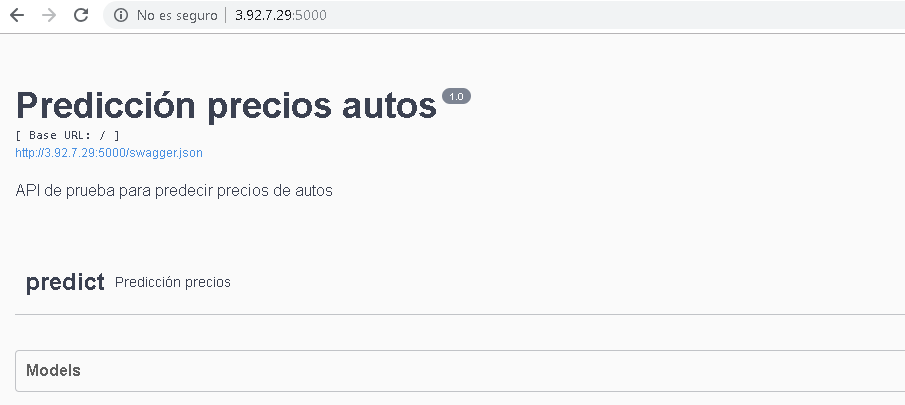

##### Los parametros a diligenciar son 'Year', 'Mileage', 'State', 'Make' y 'Model'

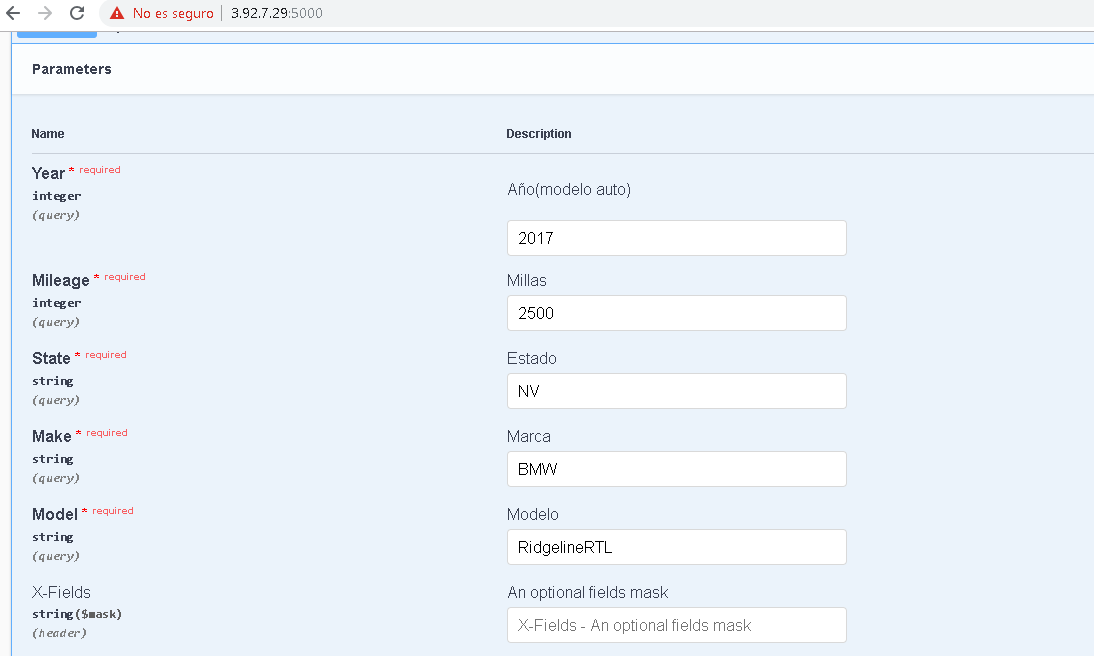

In [10]:
##### La respuesta para los parámetros dados es 43771.50175782

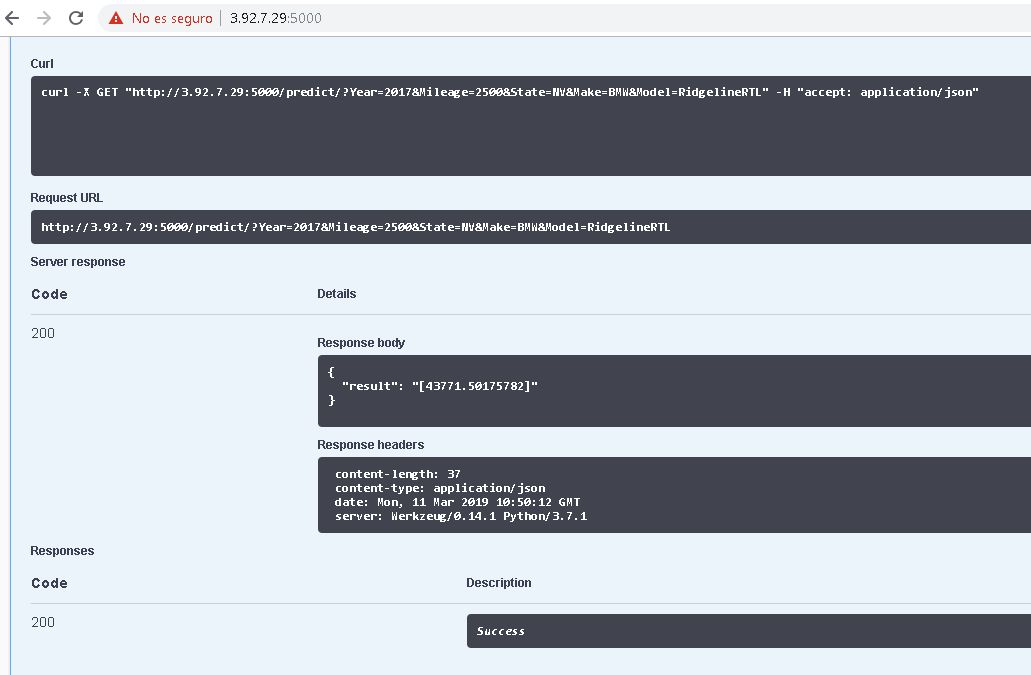